# Read python codes

In [48]:
import pandas as pd
import os
import re
file_path="de-id_codes"
Name_of_Codes_list=[]
writer=['Andre','ChenLin','FeverDreams','Itoshikihiro','Mahmoud','Nasim','Parisa','Shaojun']
Python_Codes={}
for n in writer:
    Python_Codes[n]=[]

for root, dirs, files in os.walk(file_path):
    
    for name in files:
        
        if name.endswith((".py")) and ("de" in name) and (not re.match(name,"deid.py")) and (not name.startswith(("._"))):
            Name_of_Codes_list.append(name)
            myfile = open(os.path.join(root, name))
            txt = myfile.read()
            index=writer.index(root.split("\\")[1])
            Python_Codes[writer[index]].append(txt)
for keys in Python_Codes:
    text=' '
    for i in range(len(Python_Codes[keys])):
        text=text + Python_Codes[keys][i][:]
    Python_Codes[keys]=text


# Universal sentence equivalence

In [38]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns


In [7]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/2" #@param ["https://tfhub.dev/google/universal-sentence-encoder/2", "https://tfhub.dev/google/universal-sentence-encoder-large/3"]

In [8]:
# Import the Universal Sentence Encoder's TF Hub module
embed = hub.Module(module_url)
# Reduce logging output.
tf.logging.set_verbosity(tf.logging.ERROR)
with tf.Session() as session:
  session.run([tf.global_variables_initializer(), tf.tables_initializer()])

INFO:tensorflow:Using C:\Users\paris\AppData\Local\Temp\tfhub_modules to cache modules.


# Preprocessing 

In [49]:
#remove the parts that should be highly similar to the original code
#remove input output discreptions
for key in Python_Codes.keys():
    Python_Codes[key].replace("_", " ")
    re.sub(r"\'''.+\'''",'',Python_Codes[key])
    re.sub(r'\""".+\"""','',Python_Codes[key])


# Plot similarity

In [44]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")

  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(session_, input_tensor_, messages_, labels, encoding_tensor):
  message_embeddings_ = session_.run(
      encoding_tensor, feed_dict={input_tensor_: messages_})
  plot_similarity(labels, message_embeddings_, 90)

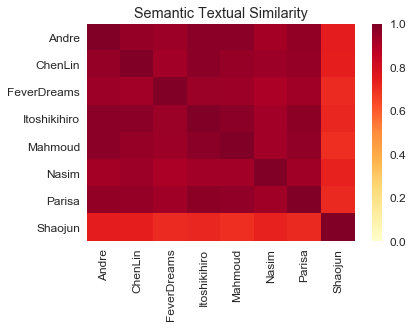

In [45]:
messages = list(Python_Codes.values())

similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = embed(similarity_input_placeholder)
with tf.Session() as session:
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  run_and_plot(session, similarity_input_placeholder, messages, Python_Codes.keys()
               ,similarity_message_encodings)


# Measuring Similarities with Levenshtein Metrics

In [51]:
!pip install python-Levenshtein 
import Levenshtein as L

  Using cached https://files.pythonhosted.org/packages/42/a9/d1785c85ebf9b7dfacd08938dd028209c34a0ea3b1bcdb895208bd40a67d/python-Levenshtein-0.12.0.tar.gz
  Running setup.py bdist_wheel for python-Levenshtein: started
  Running setup.py bdist_wheel for python-Levenshtein: finished with status 'error'
  Complete output from command c:\users\paris\anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\paris\\AppData\\Local\\Temp\\pip-install-s_4sznvt\\python-Levenshtein\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d C:\Users\paris\AppData\Local\Temp\pip-wheel-al4is3iw --python-tag cp36:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.6
  creating build\lib.win-amd64-3.6\Levenshtein
  copying Levenshtein\StringMatcher.py -> build\lib.win-amd64-3.6\Levenshtein
  copying Levenshtein\__init__.py -> build\l

  Failed building wheel for python-Levenshtein
Command "c:\users\paris\anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\paris\\AppData\\Local\\Temp\\pip-install-s_4sznvt\\python-Levenshtein\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\paris\AppData\Local\Temp\pip-record-t31bfp83\install-record.txt --single-version-externally-managed --compile" failed with error code 1 in C:\Users\paris\AppData\Local\Temp\pip-install-s_4sznvt\python-Levenshtein\


ModuleNotFoundError: No module named 'Levenshtein'